# Check for outliers in declared conflicts

This script can help you understand in how far your users are using domain/author conflicts.

## Domain conflicts

These are the easiest way to avoid conflicts of interests with colleagues, including 'further away' colleagues.

1) This script will visualise the number of domain conflicts per user

    -> many with '0' domain conflicts? Better send reminders...

2) You can inspect those with many conflicts, e.g. >= 10, to verify nothing suspicious is going on here

## Conflicts per paper

These are all cases for which a user declared a conflict with a paper (we count it for both PC and AC).

1) The script will visualise the number of conflicts per paper (excluding those with 0 conflicts)

    -> this just gives you a feel of what number of conflicts per paper is 'normal'
   
2) You can inspect those with many conflicts, e.g. >= 50, to verify nothing suspicious is going on here

In [1]:
import pandas as pd
# read all data we will use

# Users, # CMT: Users -> Conference User : Actions -> Export
df_users = pd.read_csv("data/Users.tsv", delimiter='\t')
# Papers, # CMT: Submissions :: Actions -> Export to Excel -> Submissions, then in Excel save as Papers.csv
df_papers = pd.read_csv("data/Papers.csv", delimiter=',', skiprows=2, index_col='Paper ID')
# ReviewerConflicts, # CMT: Submissions :: Actions -> Export to Tab Delimited -> Reviewer Conflicts
df_pc_confl = pd.read_csv("data/ReviewerConflicts.txt", delimiter='\t')
# MetaReviewerConflicts, # CMT: Submissions :: Actions -> Export to Tab Delimited -> MetaReviewer Conflicts
#df_ac_confl = pd.read_csv("data/MetaReviewerConflicts.txt", delimiter='\t')

### Check number of conflict domains of users (all of authors/pc/ac)

<AxesSubplot:title={'center':'Users with that many nr of conflict domains'}>

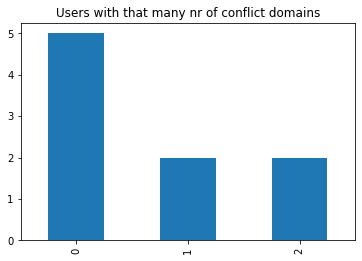

In [2]:
df_users['nr_dom_confl'] = df_users['Domain Conflicts'].str.count(';') + 1
df_users['nr_dom_confl'] = df_users['nr_dom_confl'].fillna(0).astype(int)
df_users['nr_dom_confl'].value_counts().sort_index().plot.bar(title="Users with that many nr of conflict domains")

In [3]:
# Lets look at those >= 10
df_users[df_users['nr_dom_confl'] >= 2]
# all OK

,# First Name,Middle Initial (optional),Last Name,Email,Organization,Country,Google Scholar URL,Semantic Scholar URL,DBLP URL,Domain Conflicts,nr_dom_confl
0,Tias,NaN,Guns,tias.guns@kuleuven.be,KU Leuven,Belgium,https://scholar.google.com/citations?user=hcjm...,https://www.semanticscholar.org/author/1834512,NaN,kuleuven.be;vub.be,2
1,Grigorios,NaN,Tsoumakas,greg@csd.auth.gr,Aristotle University of Thessaloniki,Greece,https://scholar.google.com/citations?user=PlGK...,https://www.semanticscholar.org/author/2502501,https://dblp.org/pid/38/6253,auth.gr; ibm.com,2


### Check number of conflicts per paper

In [4]:
# add PC and AC confl count
df_papers = df_papers.merge(df_pc_confl.groupby('# Paper ID').count(), left_index=True, right_index=True).rename(columns={'Reviewer Email': 'confl_pc'})
#df_papers = df_papers.merge(df_ac_confl.groupby('# Paper ID').count(), left_index=True, right_index=True).rename(columns={'Meta-Reviewer Email': 'confl_ac'})
df_papers['confl_tot'] = df_papers['confl_pc']#+df_papers['confl_ac']
#df_papers.head()

<AxesSubplot:title={'center':'Papers with that many nr of ac/pc conflicts'}>

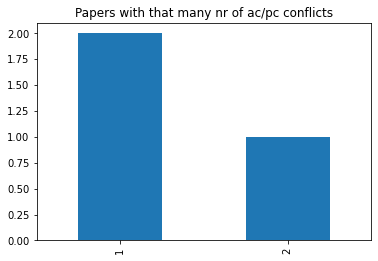

In [5]:
df_papers['confl_tot'].value_counts().sort_index().plot.bar(title="Papers with that many nr of ac/pc conflicts")

In [6]:
# Lets look at those >= 50
df_papers[df_papers['confl_tot'] >= 2]
# all OK

,Created,Last Modified,Paper Title,Abstract,Primary Contact Author Name,Primary Contact Author Email,Authors,Author Names,Author Emails,Track Name,...,SeniorMetaReviewers,SeniorMetaReviewerEmails,Q1 (Track),Q2 (Ethical implications),"Q3 (Reproducible research, data)","Q4 (Reproducible research, code)",Q5 (Student paper),Q6 (Submitting and reviewing),confl_pc,confl_tot
Paper ID,,,,,,,,,,,,,,,,,,,,,
104,3/31/2022 4:02:51 AM -07:00,4/1/2022 8:32:02 AM -07:00,"Papers are red, roses are blue",A paper on things that matter,Tira Lala,tira.lala@example.com,Tira Lala (Example dot com)*; Oh My (Example d...,"Lala, Tira*; My, Oh",Tira.lala@example.com*; oh.my@example.com,My Track,...,NaN,NaN,Research track,We have considered the ethical implications an...,(part of) the data is already publicly availab...,the code of our method(s) are already publicly...,Yes (student paper),NaN,2,2
